# <center> <div align="center"> PySensCraft - Visualizations <div/>
<br/>

**Note**: *this notebook was created for the purpose of providing an example usage of the graphs available in the library. For in-depth sensitivity analysis guide see* [`examples.ipynb`](./examples.ipynb)

<br/>

In [1]:
## Necessary imports for the notebook to work
import numpy as np
import matplotlib.pyplot as plt
from pysenscraft import ranking, graphs, criteria

<br/>

### **Table of contents:**
1. [Alternative submodule](#1)
1. [Promotion-demotion ranking graph](#2)
1. [Preference distribution](#3)
1. [Rankings distribution](#4)
1. [Values distribution](#5)
1. [Weights barplot](#3)

<a id="1"></a><br/>
## 1. Heatmap

The main usage of the heatmap is for visualization of the fuzzy ranking approach

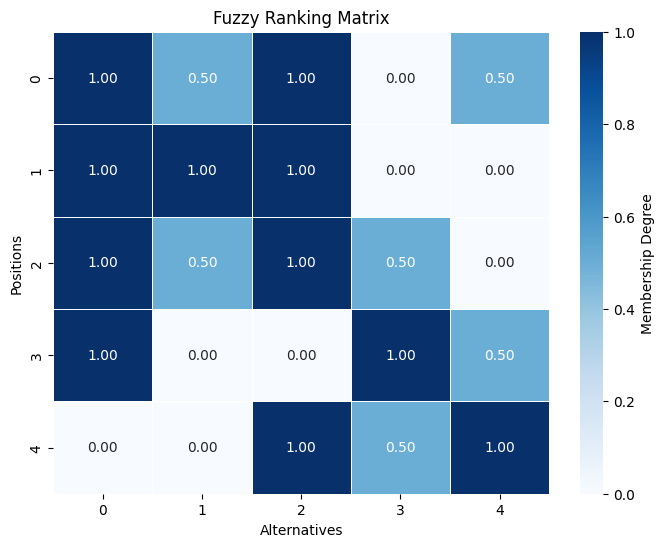

In [27]:
rankings = np.array([
    [1, 2, 3, 4, 5],
    [2, 1, 5, 3, 4],
    [4, 3, 2, 5, 1],
    [3, 2, 1, 4, 5],
])
fuzzy_ranking = ranking.fuzzy_ranking(rankings, normalization_axis=0)
graphs.heatmap(fuzzy_ranking)
plt.show()

However to the heatmap function can be passed any array that contains different values in form of a matrix. 
- The xlabel, ylabel, title and color bar label can be overriden.
- figsize can be specified

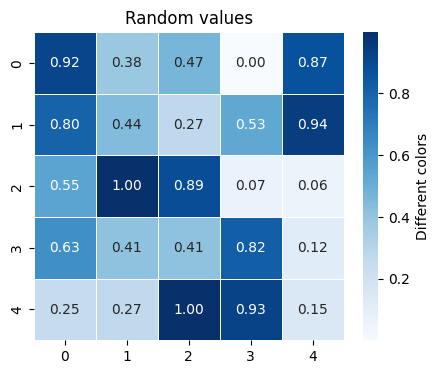

In [28]:
random_values = np.random.random((5, 5))
cbar_kwargs = {
    'label': 'Different colors'
}
graphs.heatmap(random_values, title='Random values', xlabel='', ylabel='', cbar_kwargs=cbar_kwargs, figsize=(5, 4))
plt.show()

It is possible to create figure before heatmap call and passing ax on which plot should be drawn. ax is returned from function if further changes are necessary.

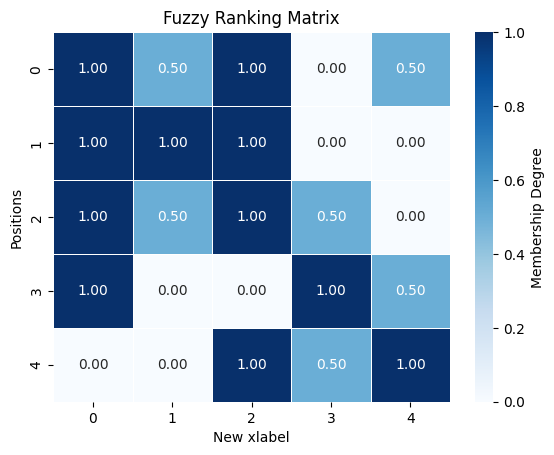

In [29]:
fig, ax = plt.subplots()
ax = graphs.heatmap(fuzzy_ranking, ax=ax)
ax.set_xlabel('New xlabel')
plt.show()

#### **Other parameters**:
- `cmap` - changes color map used by heatmap
- `annotate` - controls wether numbers on heatmap cells should be shown
- `fmt` - controls how numbers on heatmap cells should be formatted
- `linewidths` - controls the width of lines separating heatmap cells
- `label_fontsize` - controls label font size
- `title_fontsize` - controls title font size

---

<a id="2"></a><br/>
## 2. Promotion-demotion ranking graph

Promotion-demotion graph includes subgraphs that allow for more freedom or specified use cases

- Percentage graph - offers a way to present percentage value changes

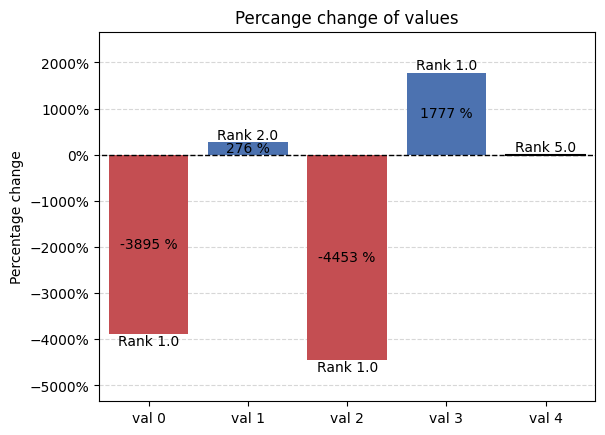

In [2]:
palette = {
    'positive': '#4c72b0',
    'neutral': 'black',
    'negative': '#c44e52',
    }
percentage_kwargs = {
    'title':'Percange change of values', 
    'ylabel':'Percentage change'
    }
percentage_changes = [-3895.4559558861965, 276.3139391152694, -4453.417374310514, 1776.7036818539723, 0] 
new_positions = [1.0, 2.0, 1.0, 1.0, 5.0]
graphs.percentage_graph(percentage_changes, new_positions, palette=palette, percentage_kwargs=percentage_kwargs, xticks=[f'val {idx}' for idx in range(len(percentage_changes))])
plt.show()

- Rank graph - offers visualization of position change of alternatives.

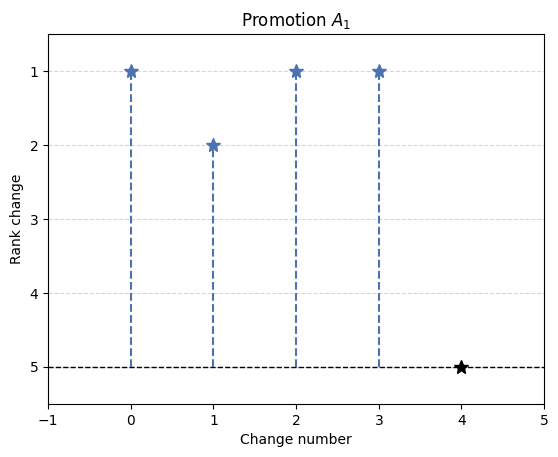

In [4]:
palette = {
    'positive': '#4c72b0',
    'neutral': 'black',
    'negative': '#c44e52',
    }
rank_kwargs = {
    'title':'Promotion $A_1$', 
    'ylabel':'Rank change'
    }
initial_rank = 5
new_positions = [1.0, 2.0, 1.0, 1.0, 5.0]
ax = graphs.rank_graph(initial_rank, new_positions, palette=palette, rank_kwargs=rank_kwargs)
ax.set_xlabel('Change number')
plt.xlim(-1, 5)
plt.show()

Using promotion-demotion graph as intended the variables should be prepared in following manner when using either `ranking_promotion()` or `ranking_demotion()`.

In [8]:
# For full example see examples.ipynb
matrix = np.array([
    [4, 2, 6],
    [7, 3, 2],
    [9, 6, 8]
])
initial_ranking = np.array([2.0, 3.0, 1.0])
example_demotion_output = [[0, 0, 5.0, 3],
                        [0, 1, 1.5, 3],
                        [0, 2, 7.0, 3],
                        [1, 0, 0.0, 3],
                        [1, 1, 0.0, 3],
                        [1, 2, 0.0, 3],
                        [2, 0, 36.0, 3],
                        [2, 1, 3.5, 3],
                        [2, 2, 130.0, 2]]
crit_num = 3
alt_num = 3

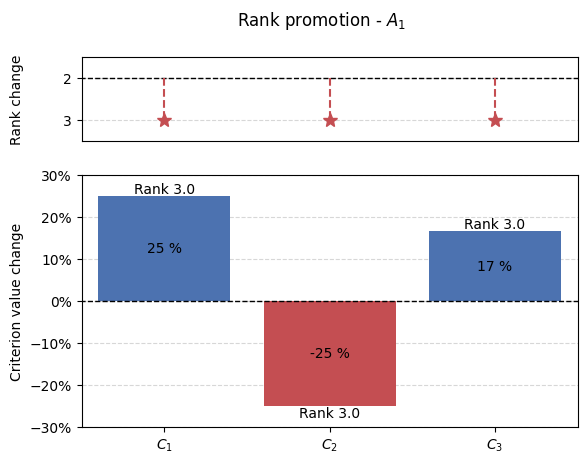

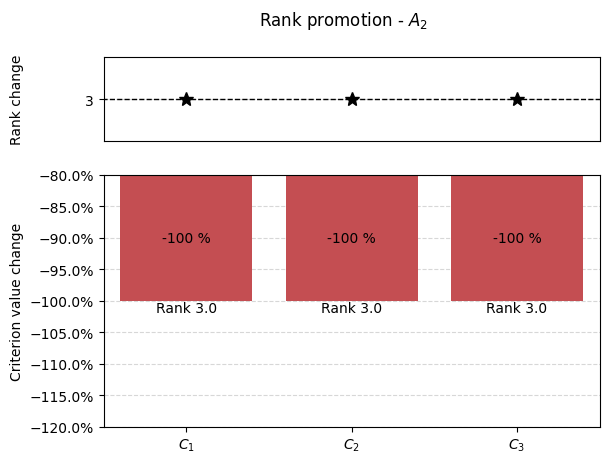

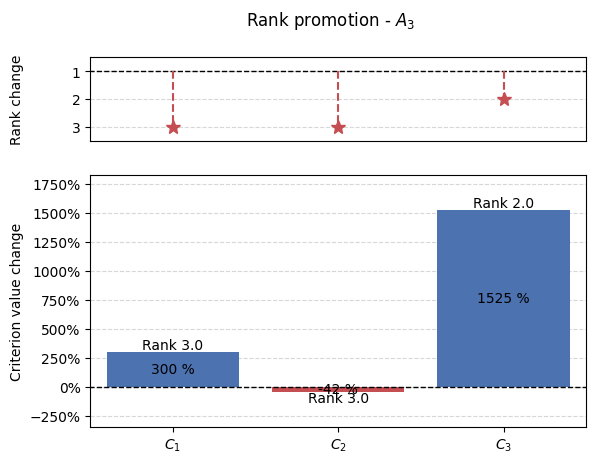

In [10]:
results = np.array(example_demotion_output)
for alt in range(alt_num):
    alt_results = results[results[:, 0] == alt]
    percentage_changes = []
    new_positions = []
    if len(alt_results):
        for crit in range(crit_num):
            r = alt_results[alt_results[:, 1] == crit]
            if len(r):
                _ , crit, change, new_pos = r[0]
                crit = int(crit)
                percentage_changes.append((change - matrix[alt, crit])/matrix[alt, crit]*100)
                new_positions.append(new_pos)
            else:
                percentage_changes.append(0)
                new_positions.append(initial_ranking[alt])
        
        graphs.pd_rankings_graph(initial_ranking[alt], new_positions, np.array(percentage_changes), kind='bar', title=f'Rank promotion - $A_{{{alt+1}}}$')

---

<a id="3"></a><br/>
## 3. Preference distribution

For this plot the data needs to be prepared in specific manner as this plot utilizes FacetGrid from `seaborn` library.

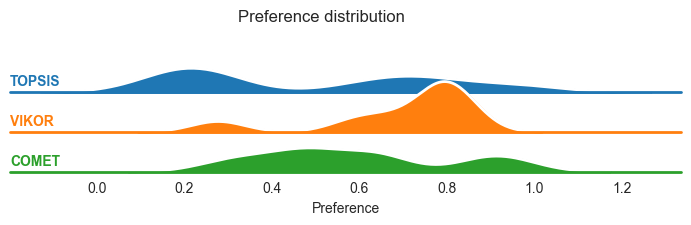

In [5]:
import seaborn as sns
import pandas as pd

methods = ["TOPSIS", "VIKOR", "COMET"]
preference = np.random.random((8, 3))
df = pd.DataFrame(preference, columns=methods)
df = df.stack().reset_index()
df.rename(columns={df.columns[1]: 'Method', df.columns[2]: 'Preference'}, inplace=True)
with sns.axes_style('white', rc={"axes.facecolor": (0, 0, 0, 0)}):
    g = sns.FacetGrid(df, row='Method', hue='Method', aspect=10, height=.75)
    graphs.preference_distribution(g, 'Preference')
    plt.suptitle('Preference distribution')
    plt.show()

This library utilizes this graph mainly for ICRA. See [`examples.ipynb`](./examples.ipynb)

---

<a id="4"></a><br/>
## 4. Rankings distribution

This graph is mainly used for the visualization of the rankings distribution.

- It can be used for single MCDA method:

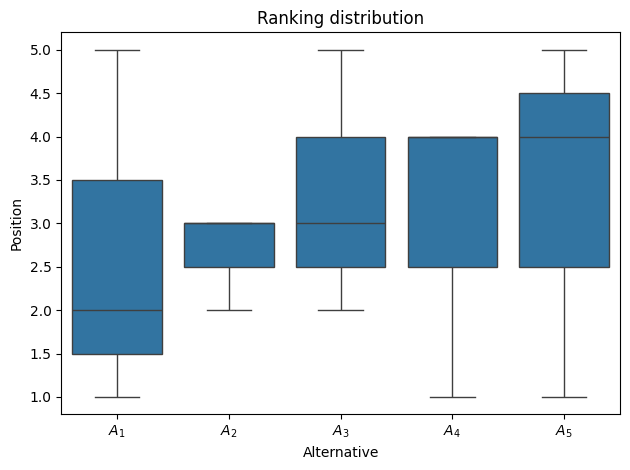

In [8]:
rankings = np.array([[1, 2, 3, 4 ,5],
                     [2, 3, 5, 4, 1],
                     [5, 3, 2, 1, 4]])
graphs.rankings_distribution(rankings, title='Ranking distribution')
plt.show()

- Or for couple MCDA methods

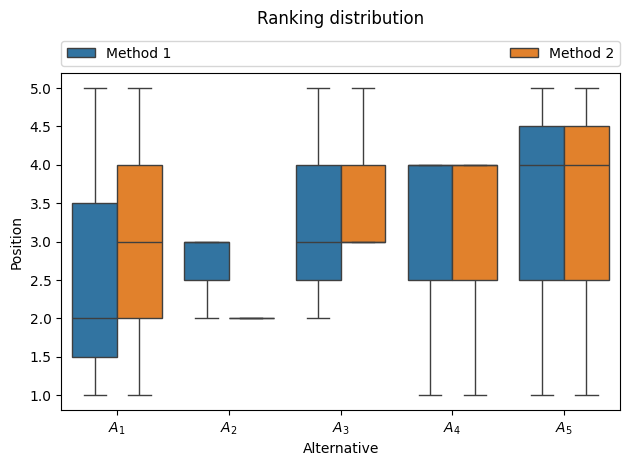

In [6]:
rankings = np.array([[[1, 2, 3, 4 ,5],
             [2, 3, 5, 4, 1],
             [5, 3, 2, 1, 4]],
             [[1, 2, 3, 4 ,5],
             [3, 2, 5, 4, 1],
             [5, 2, 3, 1, 4]]])
graphs.rankings_distribution(rankings, title='Ranking distribution')
plt.show()

Rankings can be visualized using different types of plots

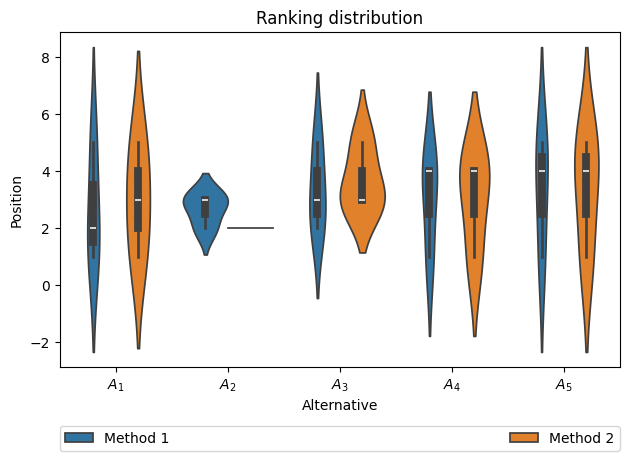

In [7]:
rankings = np.array([[[1, 2, 3, 4 ,5],
             [2, 3, 5, 4, 1],
             [5, 3, 2, 1, 4]],
             [[1, 2, 3, 4 ,5],
             [3, 2, 5, 4, 1],
             [5, 2, 3, 1, 4]]])
graphs.rankings_distribution(rankings, title='Ranking distribution', plot_type='violin', legend_loc='lower')
plt.show()

#### **Other parameters**:
- `legend_loc` - all options provide legend outside axis. Supported options: 'upper', 'lower', 'right'
- `plot_type` - type of distribution plot, based on seaborn package. Supported options: 'box', 'boxen', 'violin'
- `plot_kwargs` - keyword arguments to pass into plot function.
- `xlabel` and `ylabel` - controls label on specified axis
- `show_legend` - controls wether legend should be visible

---

<a id="5"></a><br/>
## 5. Values distribution

This plots offers a way to visualize distribution of values by histogram of kde.

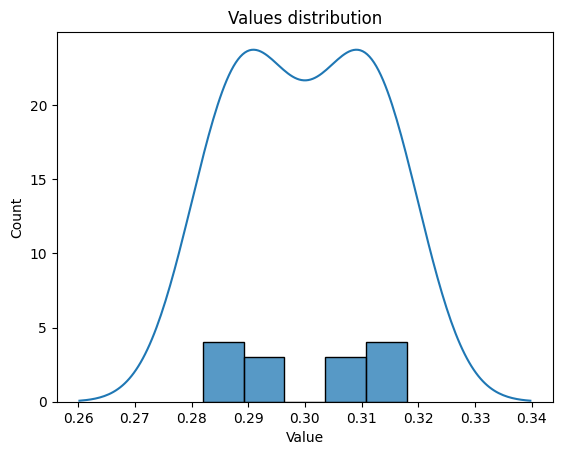

In [15]:
fig, ax = plt.subplots()
results = np.array([0.294, 0.306, 0.288, 0.312, 0.282, 0.318, 0.304, 0.296, 0.308, 0.292, 0.312, 0.288, 0.316, 0.284])
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
graphs.hist_dist(results, ax, fig=fig, slider_label='Number\nof bins', xlabel='Value', title='Values distribution', show_slider=False)
plt.show()

It offers additonal parameter (default=True) for slider to allow chaning bins number in interactive plot mode.

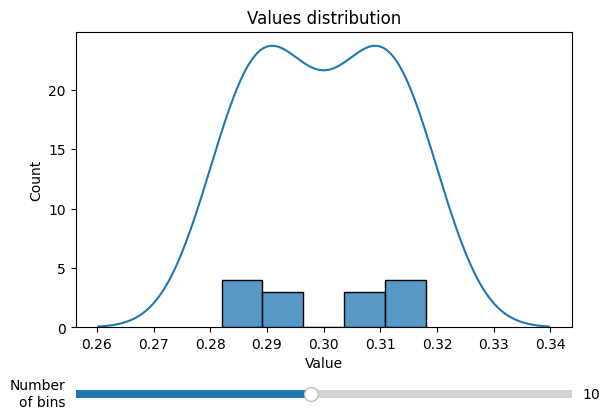

In [14]:
%matplotlib widget

fig, ax = plt.subplots()
results = np.array([0.294, 0.306, 0.288, 0.312, 0.282, 0.318, 0.304, 0.296, 0.308, 0.292, 0.312, 0.288, 0.316, 0.284])
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
_, bins_slider = graphs.hist_dist(results, ax, fig=fig, slider_label='Number\nof bins', xlabel='Value', title='Values distribution')
plt.show()

To show only histogram or only kde, kind parameter should be used.

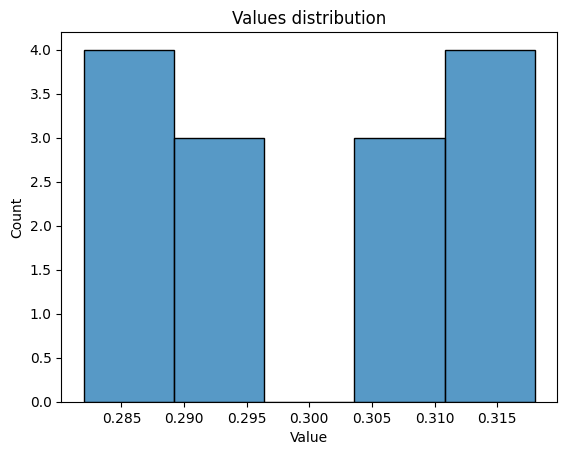

In [16]:
fig, ax = plt.subplots()
results = np.array([0.294, 0.306, 0.288, 0.312, 0.282, 0.318, 0.304, 0.296, 0.308, 0.292, 0.312, 0.288, 0.316, 0.284])
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
graphs.hist_dist(results, ax, fig=fig, slider_label='Number\nof bins', kind='hist', xlabel='Value', title='Values distribution', show_slider=False)
plt.show()

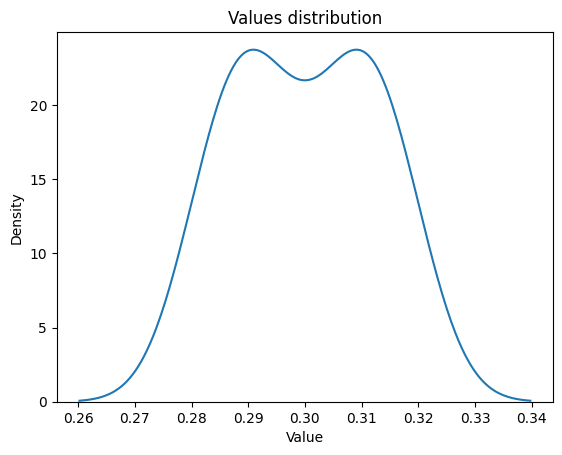

In [17]:
fig, ax = plt.subplots()
results = np.array([0.294, 0.306, 0.288, 0.312, 0.282, 0.318, 0.304, 0.296, 0.308, 0.292, 0.312, 0.288, 0.316, 0.284])
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
graphs.hist_dist(results, ax, fig=fig, slider_label='Number\nof bins', kind='kde', xlabel='Value', title='Values distribution', show_slider=False)
plt.show()

Moreover `mutli_hist_dist()` function is available which enables plotting for multiple criteria / weights / types of values on multiple subplots. If slider is shown additional slider is present to allow changing bins number for all subplots.

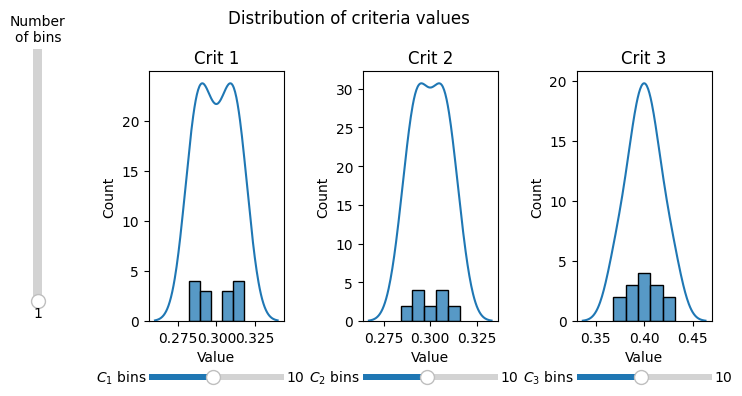

In [18]:
data = np.array([[0.294, 0.303, 0.403],
                    [0.306, 0.297, 0.397],
                    [0.288, 0.306, 0.406],
                    [0.312, 0.294, 0.394],
                    [0.282, 0.309, 0.409],
                    [0.318, 0.291, 0.391],
                    [0.304, 0.304, 0.392],
                    [0.296, 0.296, 0.408],
                    [0.308, 0.308, 0.384],
                    [0.292, 0.292, 0.416],
                    [0.312, 0.312, 0.376],
                    [0.288, 0.288, 0.424],
                    [0.316, 0.316, 0.368],
                    [0.284, 0.284, 0.432]])
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
_, _, sliders, main_slider = graphs.mutli_hist_dist(data, title_pos=0.5, nrows=1, ncols=3, figsize=(8, 4))
plt.show()

---

<a id="6"></a><br/>
## 6. Weights barplot

The weights barplot provides a way of visualizing weights for given decision-making problem.

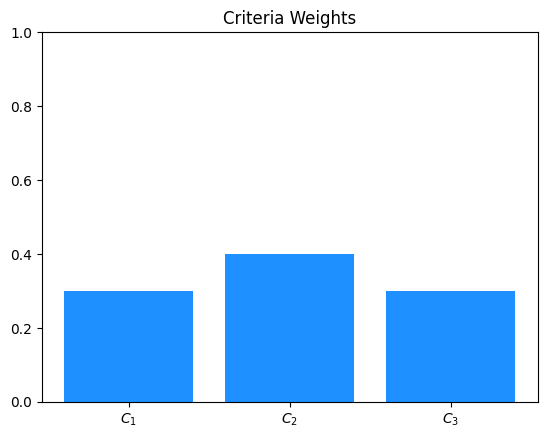

In [4]:
weights = np.array([0.3, 0.4, 0.3])
title = 'Criteria Weights'
ax, bars = graphs.weights_barplot(weights, title)
plt.show()

The weights barplot ca be further modified using different parameters.

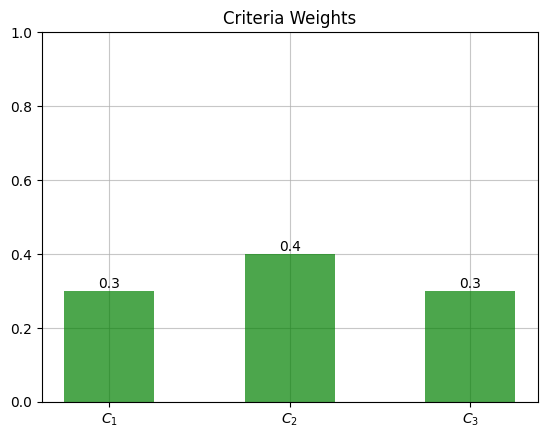

In [2]:
weights = np.array([0.3, 0.4, 0.3])
title = 'Criteria Weights'
ax, bars = graphs.weights_barplot(weights, title, color='green', width=0.5, alpha=0.7, grid_on=True, annotate_bars=True)
plt.show()

#### **Parameters**:
- `width` - controls width of the bars in the bar plot
- `color` - can be used to change color of the bars in the bar plot
- `alpha` - controls opacity of the bars in the bar plot
- `grid_on` - controls wether grid lines should be drawn
- `annotate_bars` - controls wether bar should be annotated with its corresponding weight value

The above plot can be used in interactive version to allow for visualization of different weights vectors. It can be achieved using `slider_weights_barplot`

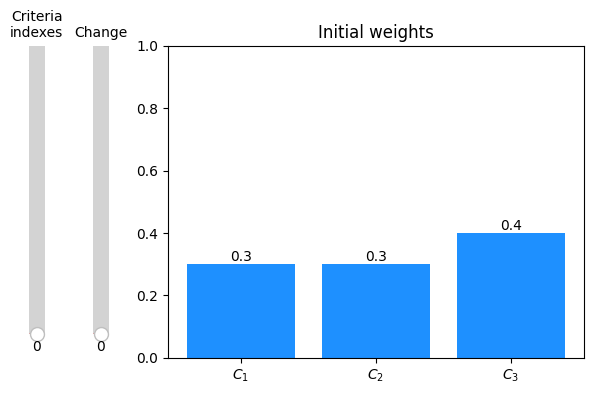

In [7]:
%matplotlib widget

weights = np.array([0.3, 0.3, 0.4])
percentages = np.array([5, 5, 5])
indexes = np.array([[0, 1], 2], dtype='object')
results = criteria.percentage_modification(weights, percentages, indexes=indexes)
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
ax, criteria_slider, change_slider = graphs.slider_weights_barplot(weights, results, percentage_change=True, annotate_bars=True)
plt.show()